<a href="https://colab.research.google.com/github/QuanRy/SII_V2/blob/main/lab_7/lab_7_SII_4_kurs_Samorokov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Добавим **библиотеки**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

Посмотрим первые 10 строк датасета

In [3]:
# Подключим файл "alcohol-consumption"
df = pd.read_csv("alcohol-consumption.csv", delimiter=',')
# Просмотрим содержимое
df.head(10)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
5,Nigeria,13.4,9.6,3.8,7.9,0.4,0.6,91.1,13.0,12.5
6,Ireland,13.0,11.3,1.4,47.0,28.0,18.8,6.2,13.5,13.9
7,Moldova,13.0,11.5,1.4,35.4,44.6,20.0,0.0,12.6,12.4
8,Latvia,12.9,11.1,1.9,42.8,11.1,40.0,6.1,14.0,15.1
9,Bulgaria,12.7,11.4,1.3,38.8,17.2,42.9,1.2,13.0,13.4


In [22]:
# Просмотрим информацию о столбцах датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 189 non-null    object 
 1   total_consumption       189 non-null    float64
 2   recorded_consumption    189 non-null    float64
 3   unrecorded_consumption  189 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         189 non-null    float64
 9   2025_projection         189 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


# **Проведем исследование данных**

In [7]:
# поиск среднего dti (отношение долга к доходам)
df['total_consumption'].mean()

6.1835978835978835

In [8]:
#поиск медианы
df['total_consumption'].median()

6.3

In [9]:
#поиск минимума
df['total_consumption'].min()

0.0

In [10]:
#поиск максимума
df['total_consumption'].max()

16.9

In [11]:
# удаление повторяющихся строк
df.drop_duplicates()

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
...,...,...,...,...,...,...,...,...,...,...
184,Bangladesh,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
185,Kuwait,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
186,Libya,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
187,Mauritania,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [12]:
# дисперсия для конкретного поля
df['total_consumption'].var()

17.01520826297422

In [13]:
# дисперсия для всех полей
df.var()

total_consumption          17.015208
recorded_consumption       14.247647
unrecorded_consumption      0.794700
beer_percentage           490.503125
wine_percentage           328.445573
spirits_percentage        577.299744
other_percentage          529.624882
2020_projection            16.820590
2025_projection            17.463893
dtype: float64

In [14]:
# стандартное отклонение
df.std()

total_consumption          4.124949
recorded_consumption       3.774605
unrecorded_consumption     0.891459
beer_percentage           22.147305
wine_percentage           18.123067
spirits_percentage        24.027063
other_percentage          23.013580
2020_projection            4.101291
2025_projection            4.178982
dtype: float64

In [15]:
# поиск зависимости между recorded_consumption (зарегистрированным потреблением) и unrecorded_consumption (незарегистрированнаым)
df['recorded_consumption'].corr(df['unrecorded_consumption'])

0.33453615641500295

<Axes: xlabel='recorded_consumption', ylabel='unrecorded_consumption'>

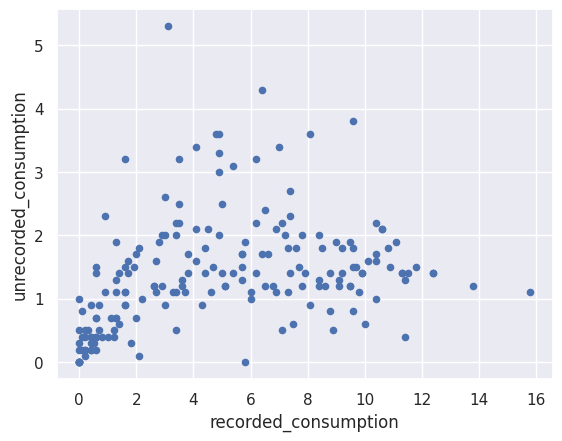

In [16]:
df.plot.scatter(x='recorded_consumption', y='unrecorded_consumption')

<Axes: ylabel='Frequency'>

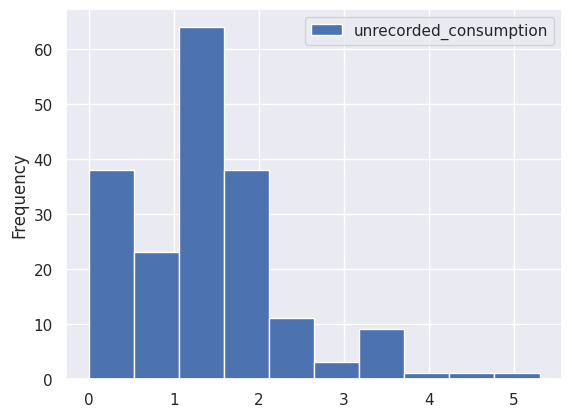

In [17]:
df.plot.hist(x='recorded_consumption', y='unrecorded_consumption')

<Axes: xlabel='recorded_consumption', ylabel='Density'>

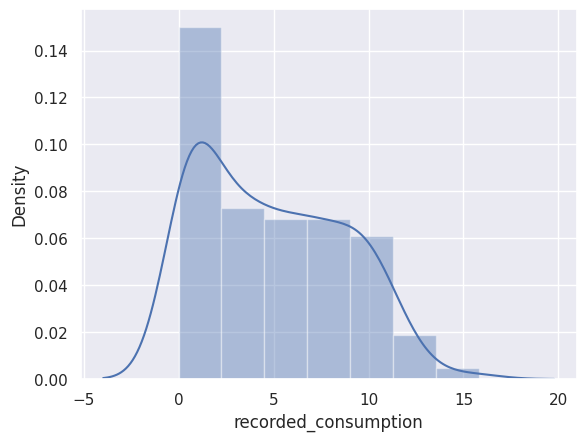

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['recorded_consumption'])

<Axes: xlabel='unrecorded_consumption', ylabel='Density'>

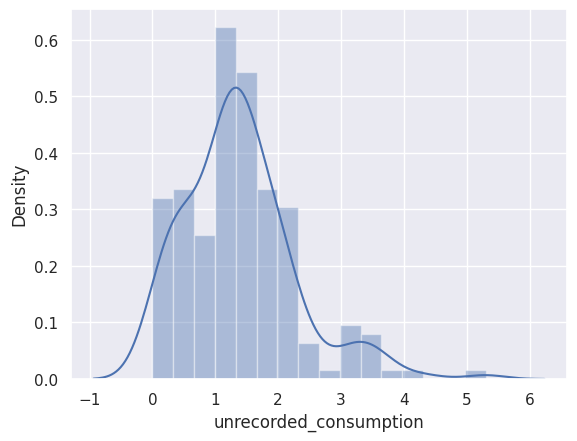

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df['unrecorded_consumption'])

In [18]:

df[['recorded_consumption','unrecorded_consumption']].describe()

,recorded_consumption,unrecorded_consumption
count,189.000000,189.000000
mean,4.923280,1.379894
std,3.774605,0.891459
min,0.000000,0.000000
25%,1.400000,0.800000
50%,4.500000,1.300000
75%,7.900000,1.800000
max,15.800000,5.300000


## **Задача машинного обучения, с целью анализа данных**

# **Цель анализа данных:**
Исследовать особенности потребления алкоголя в различных странах с использованием датасета "alcohol-consumption" и выявить закономерности и тренды.

# **Задачи анализа данных:**
1. **Исследование общего потребления алкоголя:**
   - Анализ общего потребления алкоголя в различных странах.
   - Идентификация стран с самым высоким и самым низким уровнем потребления.

2. **Анализ разделения потребления:**
   - Оценка доли записанного и незаписанного потребления алкоголя.
   - Выявление стран, где наблюдается значительное незаписанное потребление.

3. **Исследование структуры потребления по видам напитков:**
   - Анализ процентного соотношения потребления пива, вина, крепких напитков и других напитков в каждой стране.
   - Выявление стран с наибольшим и наименьшим потреблением определенного типа напитка.

4. **Прогнозирование потребления на 2020 и 2025 годы:**
   - Исследование прогнозных данных потребления алкоголя на 2020 и 2025 годы.
   - Оценка тенденций роста или снижения потребления в различных странах.

# **АНАЛИЗ ДАННЫХ**

In [52]:
# Чтение датасета из файла
df = pd.read_csv('alcohol-consumption.csv')

# Заменяем значения в столбцах, кроме 'country'
columns_to_transform = ['total_consumption', 'recorded_consumption', 'unrecorded_consumption',
                         'beer_percentage', 'wine_percentage', 'spirits_percentage',
                         'other_percentage', '2020_projection', '2025_projection']

# Преобразуем значения в числа и заменяем в соответствии с условием
# Пусть будет 1, когда значение в процентах выше или равно 25%, если же нет, то - 0
df[columns_to_transform] = df[columns_to_transform].apply(lambda x: (pd.to_numeric(x, errors='coerce') >= 25.0).astype(int))
df.head(10)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,0,0,0,1,0,1,0,0,0
1,Lithuania,0,0,0,1,0,1,0,0,0
2,Czech Republic,0,0,0,1,0,1,0,0,0
3,Seychelles,0,0,0,1,0,0,0,0,0
4,Germany,0,0,0,1,1,0,0,0,0
5,Nigeria,0,0,0,0,0,0,1,0,0
6,Ireland,0,0,0,1,1,0,0,0,0
7,Moldova,0,0,0,1,1,0,0,0,0
8,Latvia,0,0,0,1,0,1,0,0,0
9,Bulgaria,0,0,0,1,0,1,0,0,0


# **ЛИНЕЙНАЯ РЕГРЕССИЯ**

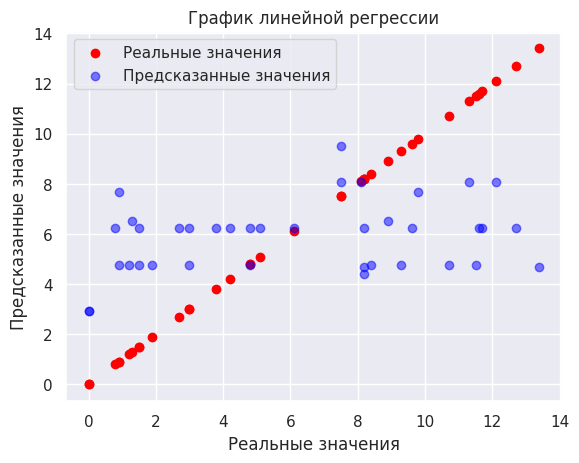

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Чтение датасета из файла
df = pd.read_csv('alcohol-consumption.csv')

# Заменяем значения в столбцах, кроме 'country', на 1 и 0
columns_to_transform = ['recorded_consumption', 'unrecorded_consumption',
                         'beer_percentage', 'wine_percentage', 'spirits_percentage',
                         'other_percentage', '2020_projection', '2025_projection']

df[columns_to_transform] = df[columns_to_transform].apply(lambda x: (pd.to_numeric(x, errors='coerce') >= 25.0).astype(int))

# Заменяем NaN значения в численных столбцах на среднее значение
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Выбираем признаки (X) и целевую переменную (y)
X = df.drop(['country', 'total_consumption'], axis=1)
y = df['total_consumption']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

# Получаем предсказания для тестового набора
y_pred = model.predict(X_test)

# Строим график реальных значений
plt.scatter(y_test, y_test, color='red', label='Реальные значения')

# Строим график предсказанных значений
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Предсказанные значения')

plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения")
plt.title("График линейной регрессии")
plt.legend()

# **ЛОГИЧЕСКАЯ РЕГРЕССИЯ**

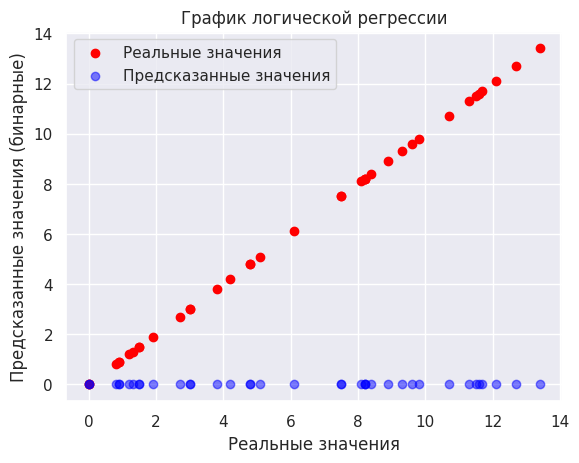

In [90]:
# Чтение датасета из файла
df = pd.read_csv('alcohol-consumption.csv')

# Заменяем значения в столбцах, кроме 'country', на 1 и 0
columns_to_transform = ['recorded_consumption', 'unrecorded_consumption',
                         'beer_percentage', 'wine_percentage', 'spirits_percentage',
                         'other_percentage', '2020_projection', '2025_projection']

df[columns_to_transform] = df[columns_to_transform].apply(lambda x: (pd.to_numeric(x, errors='coerce') >= 25.0).astype(int))

# Заменяем NaN значения в численных столбцах на среднее значение
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Выбираем признаки (X) и целевую переменную (y)
X = df.drop(['country', 'total_consumption'], axis=1)
y = df['total_consumption']

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

# Получаем предсказания для тестового набора
y_pred = model.predict(X_test)

# Преобразуем предсказания в бинарные значения с использованием порога
threshold = 15
y_pred_binary = (y_pred > threshold).astype(int)

# Строим график реальных значений
plt.scatter(y_test, y_test, color='red', label='Реальные значения')

# Строим график предсказанных значений
plt.scatter(y_test, y_pred_binary, color='blue', alpha=0.5, label='Предсказанные значения')

plt.xlabel("Реальные значения")
plt.ylabel("Предсказанные значения (бинарные)")
plt.title("График логической регрессии")
plt.legend()
plt.show()

In [73]:
# Чтение датасета из файла
df = pd.read_csv('alcohol-consumption.csv')

# Заменяем значения в столбцах, кроме 'country'
columns_to_transform = ['total_consumption', 'recorded_consumption', 'unrecorded_consumption',
                         'beer_percentage', 'wine_percentage', 'spirits_percentage',
                         'other_percentage', '2020_projection', '2025_projection']

# Преобразуем значения в числа и заменяем в соответствии с условием
# Пусть будет 1, когда значение в процентах выше или равно 25%, если же нет, то - 0
df[columns_to_transform] = df[columns_to_transform].apply(lambda x: (pd.to_numeric(x, errors='coerce') >= 25.0).astype(int))
df.head(10)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,0,0,0,1,0,1,0,0,0
1,Lithuania,0,0,0,1,0,1,0,0,0
2,Czech Republic,0,0,0,1,0,1,0,0,0
3,Seychelles,0,0,0,1,0,0,0,0,0
4,Germany,0,0,0,1,1,0,0,0,0
5,Nigeria,0,0,0,0,0,0,1,0,0
6,Ireland,0,0,0,1,1,0,0,0,0
7,Moldova,0,0,0,1,1,0,0,0,0
8,Latvia,0,0,0,1,0,1,0,0,0
9,Bulgaria,0,0,0,1,0,1,0,0,0


In [91]:
# Разделение на числовые и категориальные данные
numeric_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')

# Создание фиктивных переменных для категориальных данных
dummy_features = pd.get_dummies(categorical_data)
X = pd.concat([numeric_data, dummy_features], axis=1)

# Выводим первые 10 строк нового датасета
X.head(10)

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,country_Afghanistan,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,16.9,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.4,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13.0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,13.0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,12.9,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,12.7,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Употребление вина пусть будет - у
y = df['wine_percentage']
y.mean()

0.25925925925925924

Train roc-auc: 1.0
Test roc-auc: 1.0


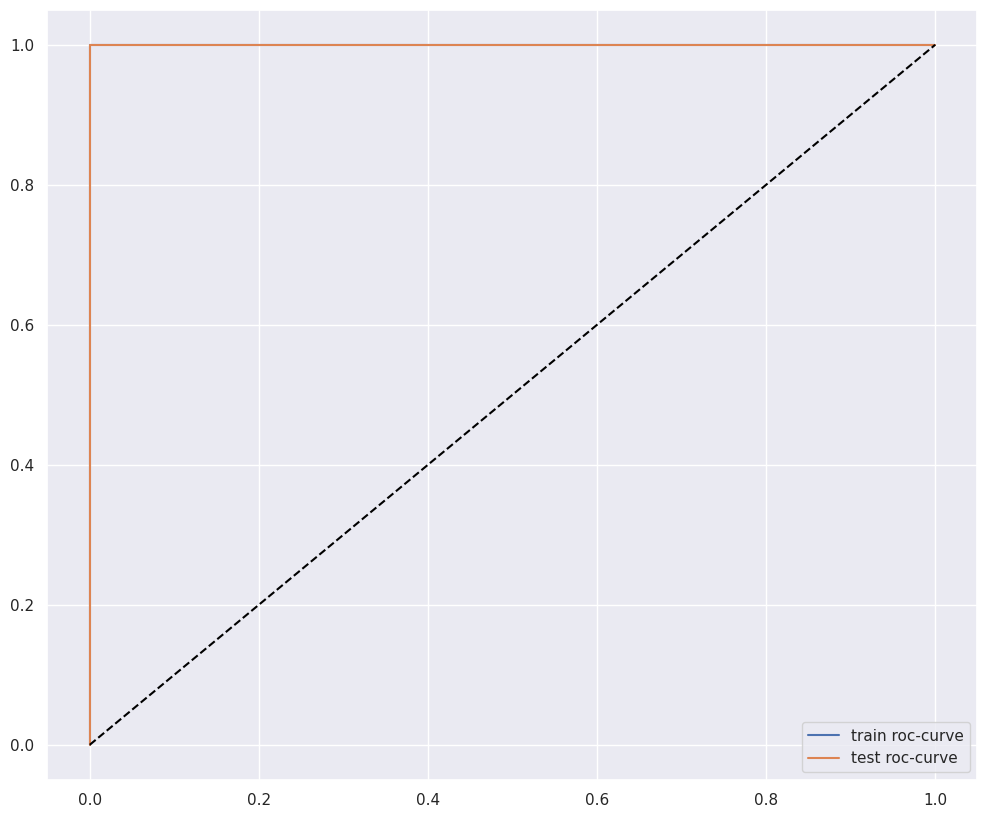

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


def plot_roc_curve(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(12,10))

    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()



model = LogisticRegression().fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

# **K-Neighbors**

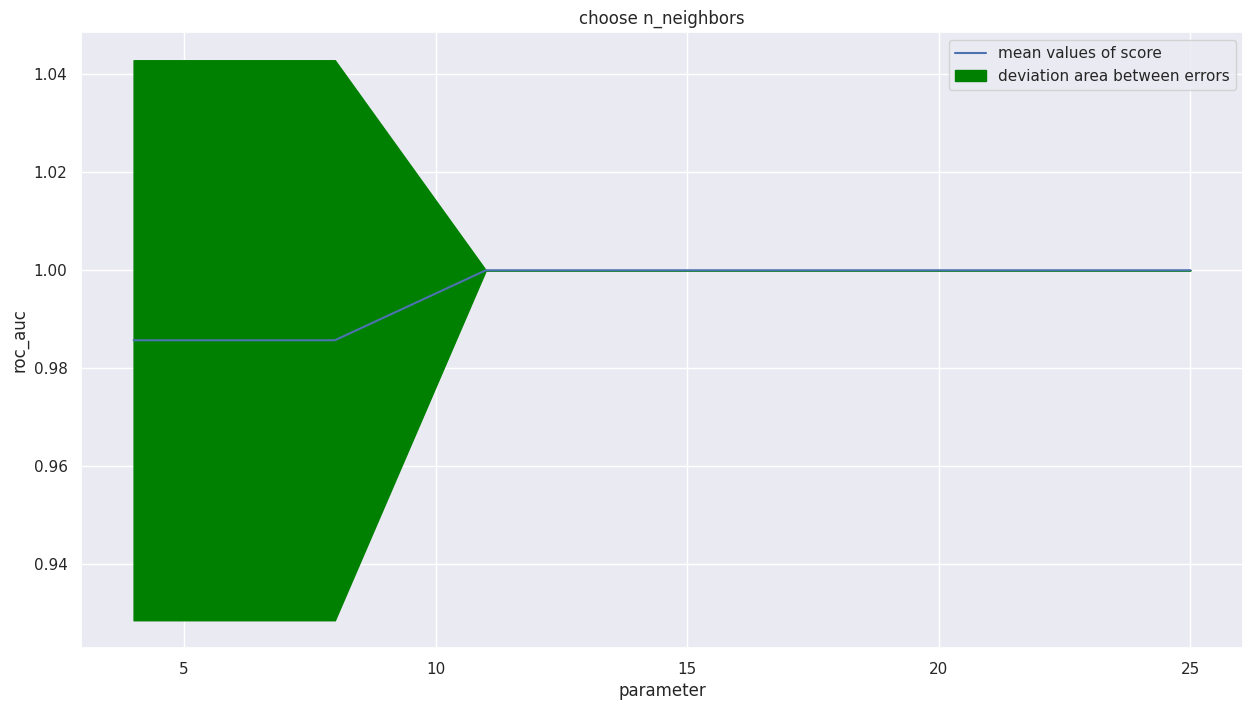

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


def search(X, y, model, param_name, grid, draw=True):
    parameters = {param_name: grid}

    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']

    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        plt.plot(grid, means, label='mean values of score')

        plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
        plt.legend()
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()

    return means, error


models = [KNeighborsClassifier(n_jobs=-1)]
param_names = ['n_neighbors']
grids = [np.array(np.linspace(4, 25, 10), dtype='int')]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale)

# **СЛУЧАЙНЫЙ ЛЕС**

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Чтение данных из файла
df = pd.read_csv('alcohol-consumption.csv')

# Заполнение пропущенных значений средними значениями
df = df.fillna(df.mean())

# Выбор признаков и целевой переменной
X = df.drop(['country', '2020_projection', '2025_projection'], axis=1)
y = df['2025_projection']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = rf_model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Важность признаков
feature_importances = rf_model.feature_importances_
features = X.columns
feature_importance_dict = dict(zip(features, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print('\nFeature Importances:')
for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance}')

Root Mean Squared Error: 1.013361355510513

Feature Importances:
total_consumption: 0.9475215305773994
spirits_percentage: 0.01637961771510944
unrecorded_consumption: 0.00875316415248225
recorded_consumption: 0.008322013037061721
other_percentage: 0.007145092132602594
wine_percentage: 0.006858950948255623
beer_percentage: 0.005019631437089101


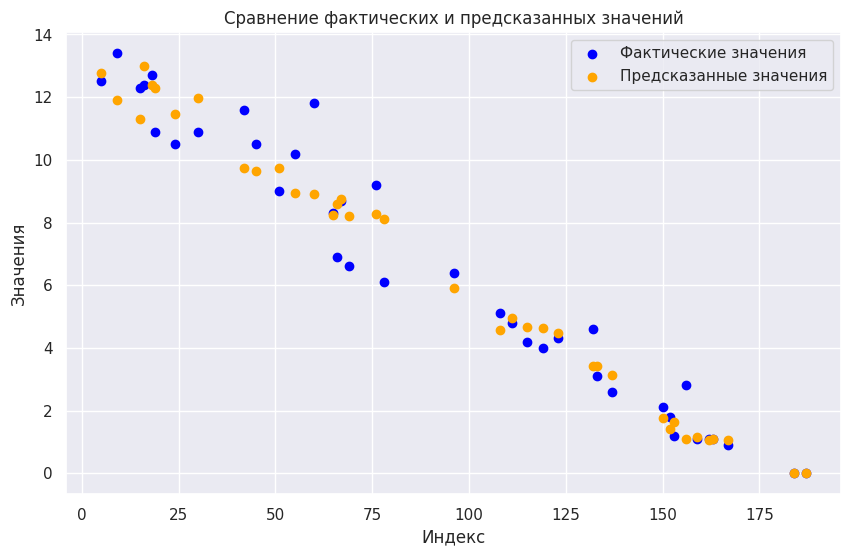

In [117]:
import matplotlib.pyplot as plt

# Создание DataFrame с фактическими и предсказанными значениями
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Отрисовка графика
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Actual'], label='Фактические значения', color='blue')
plt.scatter(results_df.index, results_df['Predicted'], label='Предсказанные значения', color='orange')
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.title('Сравнение фактических и предсказанных значений')
plt.legend()
plt.grid(True)
plt.show()

# **ГРАДИЕНТНЫЙ БУСТИНГ**

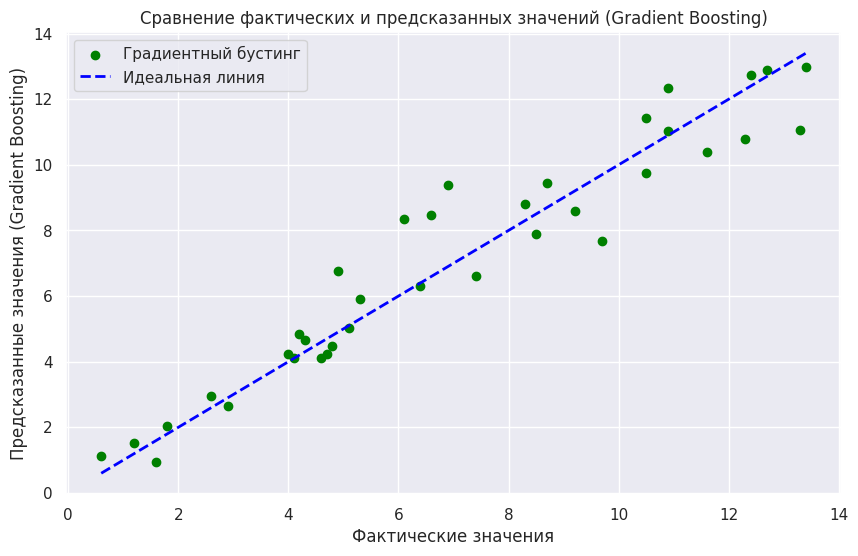

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Чтение данных из файла
df = pd.read_csv('alcohol-consumption.csv')

# Удаление строк с пропущенными значениями
df = df.dropna()

# Выбор признаков и целевой переменной
X = df.drop(['country', '2020_projection', '2025_projection'], axis=1)
y = df['2025_projection']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_gb = gb_model.predict(X_test)

# Создание DataFrame с фактическими и предсказанными значениями
results_df_gb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})

# Отрисовка графика
plt.figure(figsize=(10, 6))
plt.scatter(results_df_gb['Actual'], results_df_gb['Predicted'], label='Градиентный бустинг', color='green')
plt.plot([results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         [results_df_gb['Actual'].min(), results_df_gb['Actual'].max()],
         linestyle='--', color='blue', linewidth=2, label='Идеальная линия')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения (Gradient Boosting)')
plt.title('Сравнение фактических и предсказанных значений (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.show()

# **RNN Recurrent Neural Networks - (рекуррентные нейронные сети)**

Epoch 1/50
5/5 [==============================] - 1s 55ms/step - loss: 60.1984 - val_loss: 66.9898
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 56.3770 - val_loss: 62.5697
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 52.1846 - val_loss: 57.1135
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 46.7231 - val_loss: 49.4308
Epoch 5/50
5/5 [==============================] - 0s 9ms/step - loss: 38.9570 - val_loss: 38.1568
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 27.8961 - val_loss: 23.0173
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 15.6958 - val_loss: 9.5919
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 9.0314 - val_loss: 7.8144
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 10.6059 - val_loss: 6.7836
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 7.9398 - val_loss: 5.5112
Epoch 11/50
5/5 [======

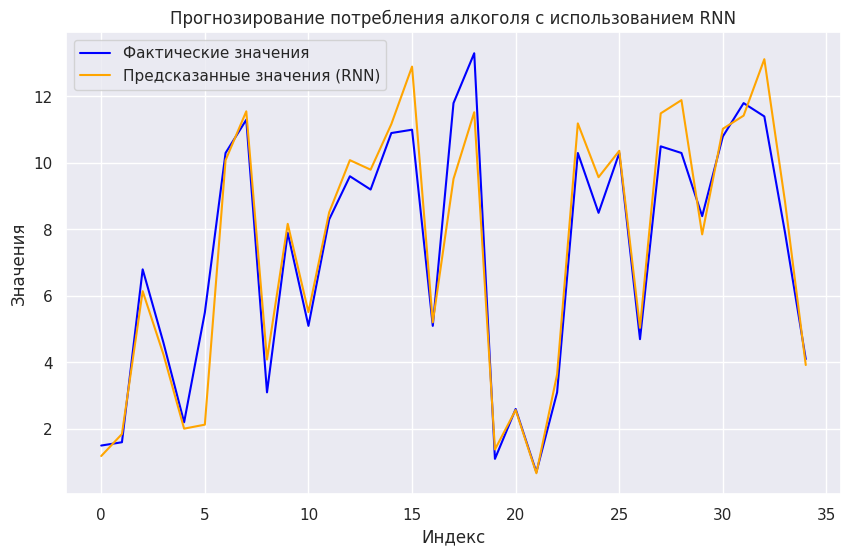

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Чтение данных из файла
df = pd.read_csv('alcohol-consumption.csv')

# Удаление строк с пропущенными значениями
df = df.dropna()

# Выбор признаков и целевой переменной
features = df.drop(['country', '2020_projection', '2025_projection'], axis=1)
target = df['2025_projection']

# Нормализация данных
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Преобразование данных в формат временных рядов
time_steps = 5  # Выберите подходящее количество временных шагов
X, y = [], []

for i in range(len(features_scaled) - time_steps):
    X.append(features_scaled[i:i+time_steps])
    y.append(target.iloc[i+time_steps])

X, y = np.array(X), np.array(y)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели RNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_steps, features.shape[1])))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Предсказание на тестовом наборе
y_pred_rnn = model.predict(X_test)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Фактические значения', color='blue')
plt.plot(y_pred_rnn, label='Предсказанные значения (RNN)', color='orange')
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.title('Прогнозирование потребления алкоголя с использованием RNN')
plt.legend()
plt.show()

ROC-AUC не может быть использована в случае, когда целевая переменная представляет собой непрерывные значения (continuous).
Давайте лучше использовать метрики для задачи регрессии, такие как Mean Squared Error (MSE)

# **Mean Squared Error (MSE)**

In [132]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Чтение данных из файла
df = pd.read_csv('alcohol-consumption.csv')

# Удаление строк с пропущенными значениями
df = df.dropna()

# Выбор признаков и целевой переменной
features = df.drop(['country', '2020_projection', '2025_projection'], axis=1)
target = df['2025_projection']

# Нормализация данных
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Преобразование данных в формат временных рядов
time_steps = 5  # Выберите подходящее количество временных шагов
X, y = [], []

for i in range(len(features_scaled) - time_steps):
    X.append(features_scaled[i:i+time_steps])
    y.append(target.iloc[i+time_steps])

X, y = np.array(X), np.array(y)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели RNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(time_steps, features.shape[1])))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Предсказание на тестовом наборе для RNN
y_pred_rnn = model.predict(X_test)

# Создание и обучение модели Градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

# Предсказание на тестовом наборе для Градиентного бустинга
y_pred_gb = gb_model.predict(X_test.reshape((X_test.shape[0], -1)))

# Создание и обучение модели Случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

# Предсказание на тестовом наборе для Случайного леса
y_pred_rf = rf_model.predict(X_test.reshape((X_test.shape[0], -1)))

# Оценка качества модели RNN
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

# Оценка качества модели Градиентного бустинга
mse_gb = mean_squared_error(y_test, y_pred_gb)

# Оценка качества модели Случайного леса
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Создаем таблицу сравнения
results_mse = pd.DataFrame({
    'Модель': ['RNN', 'Градиентный бустинг', 'Случайный лес'],
    'MSE': [mse_rnn, mse_gb, mse_rf]
})

print(results_mse)


Epoch 1/50
5/5 [==============================] - 1s 50ms/step - loss: 54.9302 - val_loss: 60.4488
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 51.1591 - val_loss: 55.8003
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 47.0127 - val_loss: 50.4921
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 42.0072 - val_loss: 43.6744
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 35.0124 - val_loss: 34.2380
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 26.1783 - val_loss: 21.4044
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 15.3128 - val_loss: 8.5919
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 7.7707 - val_loss: 5.2720
Epoch 9/50
5/5 [==============================] - 0s 9ms/step - loss: 9.3526 - val_loss: 5.7124
Epoch 10/50
5/5 [==============================] - 0s 8ms/step - loss: 7.6910 - val_loss: 4.2473
Epoch 11/50
5/5 [========

***RNN (Рекуррентные нейронные сети):*** MSE равен 1.003814. Это означает, что среднеквадратичная разница между фактическими и предсказанными значениями целевой переменной для тестового набора данных составляет примерно 1.003814.

***Градиентный бустинг:*** MSE равен 1.399643. Здесь среднеквадратичная разница между фактическими и предсказанными значениями составляет примерно 1.399643.

***Случайный лес:*** MSE равен 1.049380. Это значение показывает, что среднеквадратичная разница для случайного леса примерно 1.049380.

Таким образом, модель с наименьшим значением MSE считается наилучшей среди рассмотренных моделей, а именно - ***RNN (Рекуррентные нейронные сети)***.